In [13]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, get_new_cmap, highlight_k_points
from visualize_correlations import get_k_mesh, calculate_tri_kspace_correlations

import sys
sys.path.append('..')
from interactions import buildlattice_alltoall_primitive_vector 

In [14]:
from scipy.optimize import curve_fit

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Helper Functions

In [16]:
def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

def third_order(x, m1, m2, m3, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2 + m3 * x**3

# Load Data

In [17]:
Ls = np.arange(6,37,6)
all_scales = [0.25,0.5,1.,2.,4.0]
scales = [1.,2.,4.]
rates = [0.475,0.25,0.158]
rates = [0.158,0.25,0.475]
Ts = [0.25,1.00]
mss = ['Square', 'Triangular']

In [18]:
data = load_dict('./plotting_data/final_correlations_data.pkl')
plotting_data = load_dict('./plotting_data/final_correlations_data_plotting.pkl')


# Plot

In [19]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}

colorscale_sq = plt.get_cmap('viridis')
colorscale_tri = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[0],2.0:colors_sq[1],4.0:colors_sq[2]},
                'Triangular':{1.0:colors_tri[0],2.0:colors_tri[1],4.0:colors_tri[2]}}

### ALL


Rate=0.158 --------------------------------------------------

Rate=0.158 --------------------------------------------------

Rate=0.158 --------------------------------------------------

Second-order Fit, scale=4.0
M from <SS>:   0.1853140821913593

Second-order Fit, scale=4.0
M from <C(L/2,L/2)>:   0.19869943539350335

Third-order Fit, scale=4.0
M from <C(L/2,L/2)>:   0.21802278177191528


/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


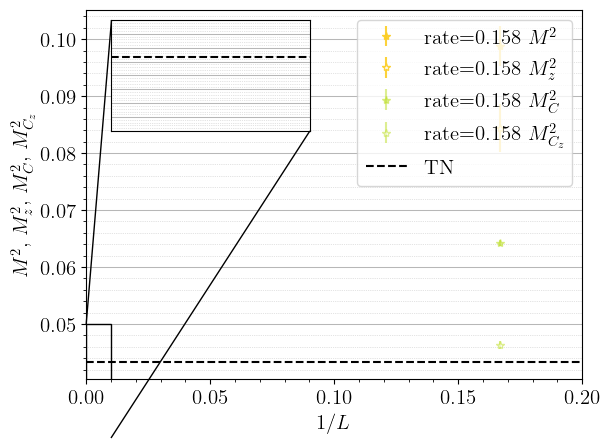

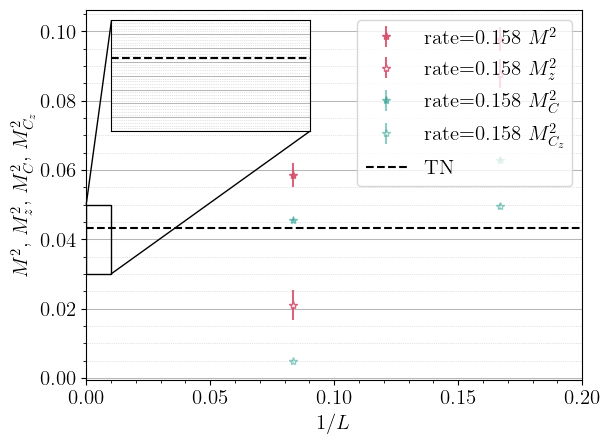

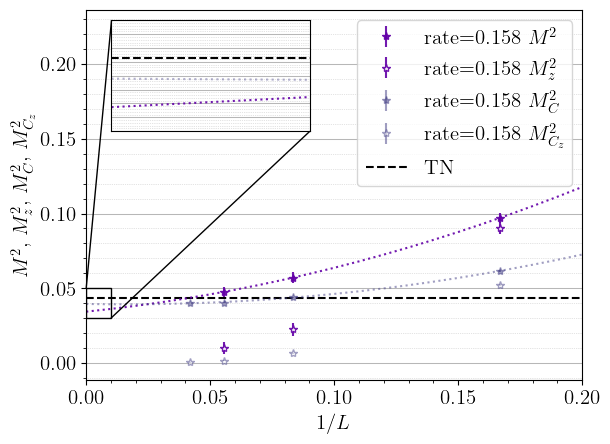

In [20]:
show_C = True
save_all = True

rates = [0.158]

## periodic bc runs
for scale_ in scales:
    fig, ax = plt.subplots()
    add_gridlines(axes='y')

    inset = inset_axes(ax, width="40%", height="30%", loc="upper left", bbox_to_anchor=(0.03,0.,1,1), bbox_transform=ax.transAxes)  # Width and height in % of the parent axes
    mark_inset(ax, inset, fc='none', ec="k", loc1=2, loc2=4, linewidth=1, zorder=10)

    for rate_ in rates:
        print(f"\nRate={rate_}","--"*25)
        bc_ = 'periodic'
        ms_ = 'Triangular'
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_corrs_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_corrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Sk from SiSj']/peri_corrs_ls**2
        peri_corrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Sk from SiSj']
        peri_zcorrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Sk from SziSzj']/peri_corrs_ls**2
        peri_zcorrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Sk from SziSzj']

        Sk_x = 1/peri_corrs_ls
        if len(peri_corrs_ls)>2:
                params, covariance = curve_fit(second_order, Sk_x, peri_corrs)
                x_mesh = np.arange(0,2*max(Sk_x),0.01)
                ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                        color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],linestyle=rate_lines[rate_])
                inset.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                        color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],linestyle=rate_lines[rate_])
                print(f"\nSecond-order Fit, scale={scale_}\nM from <SS>:   {np.sqrt(params[-1])}")

        ax.errorbar(Sk_x,peri_corrs,yerr=peri_corrs_errs,
                        marker=rate_markers[rate_],fmt='o',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],label=f'rate={rate_} $M^2$')  
        ax.errorbar(Sk_x,peri_zcorrs,yerr=peri_zcorrs_errs,
                        marker=rate_markers[rate_],fmt='o',mfc='white',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],label=f'rate={rate_} $M_z^2$')  
        inset.errorbar(Sk_x,peri_corrs,yerr=peri_corrs_errs,
                        marker=rate_markers[rate_],fmt='o',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],label=f'rate={rate_} $M^2$')  
        inset.errorbar(Sk_x,peri_zcorrs,yerr=peri_zcorrs_errs,
                        marker=rate_markers[rate_],fmt='o',mfc='white',color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],label=f'rate={rate_} $M_z^2$') 
        
        if show_C:
                peri_corrs_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['C ls']
                peri_corrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['C(L/2,L/2)']/2
                peri_corrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err C(L/2,L/2)']
                peri_zcorrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Cz(L/2,L/2)']/2
                peri_zcorrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Cz(L/2,L/2)']

                c_x = 1/peri_corrs_ls
                if len(peri_corrs_ls)>2:
                        params, covariance = curve_fit(second_order, c_x, peri_corrs)
                        x_mesh = np.arange(0,2*max(c_x),0.01)
                        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                                color=scale_shades['Square'][scale_],alpha=0.5,linestyle=rate_lines[rate_])
                        inset.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                                color=scale_shades['Square'][scale_],alpha=0.4,linestyle=rate_lines[rate_])
                        print(f"\nSecond-order Fit, scale={scale_}\nM from <C(L/2,L/2)>:   {np.sqrt(params[-1])}")

                if len(peri_corrs_ls)>3:
                        params3, covariance = curve_fit(third_order, c_x, peri_corrs)
                        # ax.plot(x_mesh,third_order(x_mesh,params3[0],params3[1],params3[2],params3[3]),
                        #         color=scale_shades['Square'][scale_],alpha=0.5,linestyle=':')
                        # inset.plot(x_mesh,third_order(x_mesh,params3[0],params3[1],params3[2],params3[3]),
                        #         color=scale_shades['Square'][scale_],alpha=0.4,linestyle=':')
                        print(f"\nThird-order Fit, scale={scale_}\nM from <C(L/2,L/2)>:   {np.sqrt(params3[-1])}")

                ax.errorbar(c_x,peri_corrs,yerr=peri_corrs_errs,
                                marker=rate_markers[rate_],fmt='o',color=scale_shades['Square'][scale_],alpha=0.5,label=f'rate={rate_}'+r' $M_{C}^2$')  
                ax.errorbar(c_x,peri_zcorrs,yerr=peri_zcorrs_errs,
                                marker=rate_markers[rate_],fmt='o',mfc='white',color=scale_shades['Square'][scale_],alpha=0.5,label=f'rate={rate_}'+r' $M_{C_z}^2$')  
                inset.errorbar(c_x,peri_corrs,yerr=peri_corrs_errs,
                                marker=rate_markers[rate_],fmt='o',color=scale_shades['Square'][scale_],alpha=0.5,label=f'rate={rate_}'+r' $M_{C}^2$')  
                inset.errorbar(c_x,peri_zcorrs,yerr=peri_zcorrs_errs,
                                marker=rate_markers[rate_],fmt='o',mfc='white',color=scale_shades['Square'][scale_],alpha=0.5,label=f'rate={rate_}'+r' $M_{C_z}^2$') 
                
#     ax.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
#     ax.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
    ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='TN')
#     inset.hlines(0.205**2,0,0.2,color='k',alpha=0.4,linestyle='--',label='GFMC')
#     inset.hlines(0.25**2,0,0.2,color='k',alpha=0.7,linestyle='--',label='ED')
    inset.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='TN')

    inset.set_xlim(0,0.01)
    inset.set_ylim(0.03, 0.05)
    add_gridlines(axes='y')
    inset.set_xticklabels([],fontsize=10)
    inset.set_yticklabels([],fontsize=10)
    inset.tick_params(axis='both', which='both', length=0, labelsize=0)

    ax.set_xlabel(r'$1/L$')
    ax.set_ylabel(r'$M^2$, $M^2_z$, $M_C^2$, $M_{C_z}^2$')
    ax.set_xlim(0,.2)
    handles, labels = ax.get_legend_handles_labels()
    order = np.roll(np.arange(len(handles)),shift=4)
    if len(rates)==1:
        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=len(rates), loc='upper right')
    else:
        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=len(rates), loc='center',bbox_to_anchor=(0.5,-0.4))

    if save_all:
        filename = f'M_scaling_peri_scale{scale_}'
        plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

if not save_all:
        filename = f'M_scaling_peri'
        plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# Visualize Correlations

36 spins
144 spins
324 spins


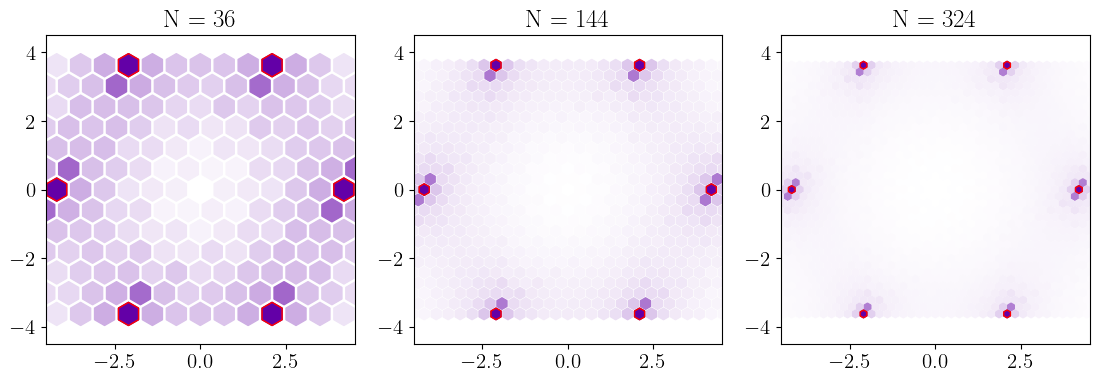

In [21]:
scale = 4.0
rate = 0.158

fig, axs = plt.subplots(1,3,figsize=(column_width*3,column_width))

p1 = (1., 0.)
p2 = (-1./2, np.sqrt(3)/2)

use_zz = False

for i, L in enumerate(Ls[:3]):    
    N = L**2
    print(f"{N} spins")

    if 'Sz' in data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00'][f"L={L}"].keys():

        kpointsx,kpointsy = get_k_mesh(L)
        if use_zz:
            rnn_Sij = 3*data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00'][f"L={L}"]['Sz']
        else:
            rnn_Sij = data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00'][f"L={L}"]['Sz'] + \
                        3*data['TriangularMS,periodicBC'][f'scale={scale},rate={rate},T=1.00'][f"L={L}"]['Sxy']

        Sk = calculate_tri_kspace_correlations(L, rnn_Sij, kpointsx, kpointsy, p1, p2, periodic=False, reorder=True)
        corrs = Sk.flatten()

        markersize=10000
        marker_size = markersize / N
        newcmp = get_new_cmap(scale_shades['Triangular'][scale])
        sc = axs[i].scatter(kpointsx, kpointsy, marker='h',s=marker_size, c=corrs, cmap=newcmp,)

        highlight_k_points(axs[i],marker_size=marker_size)
        
        axs[i].set_title(f'N = {N}')
        axs[i].set_ylim(-4.5,4.5)
        axs[i].set_xlim(-4.5,4.5)
        axs[i].set_box_aspect(1)
        # if i==2:
        #     fig.colorbar(sc, ax=axs[i])
            
plt.tight_layout()
plt.show()

# Algebraic decay of correlations?

In [22]:
C_r = {}
for l in Ls[:3]:
    print(f"L={l}")
    C_r[f"L={l}"] = {}
    interactions = buildlattice_alltoall_primitive_vector(l,periodic=True,reorder=True)
    Sij = data['TriangularMS,periodicBC']['scale=4.0,rate=0.158,T=1.00'][f'L={l}']['Sz'] + \
            data['TriangularMS,periodicBC']['scale=4.0,rate=0.158,T=1.00'][f'L={l}']['Sxy']
    for interaction, r_vec in interactions.items():
        len_r = np.round(r_vec[0]**2 + r_vec[1]**2,decimals=10)
        if len_r not in C_r[f"L={l}"].keys():
            C_r[f"L={l}"][len_r]={}
            C_r[f"L={l}"][len_r]['sum']=0
            C_r[f"L={l}"][len_r]['abs sum']=0
            C_r[f"L={l}"][len_r]['count']=0
        C_r[f"L={l}"][len_r]['abs sum'] += abs(Sij[interaction[0],interaction[1]])
        C_r[f"L={l}"][len_r]['sum'] += Sij[interaction[0],interaction[1]]
        C_r[f"L={l}"][len_r]['count'] += 1

L=6
L=12
L=18


12
40
83


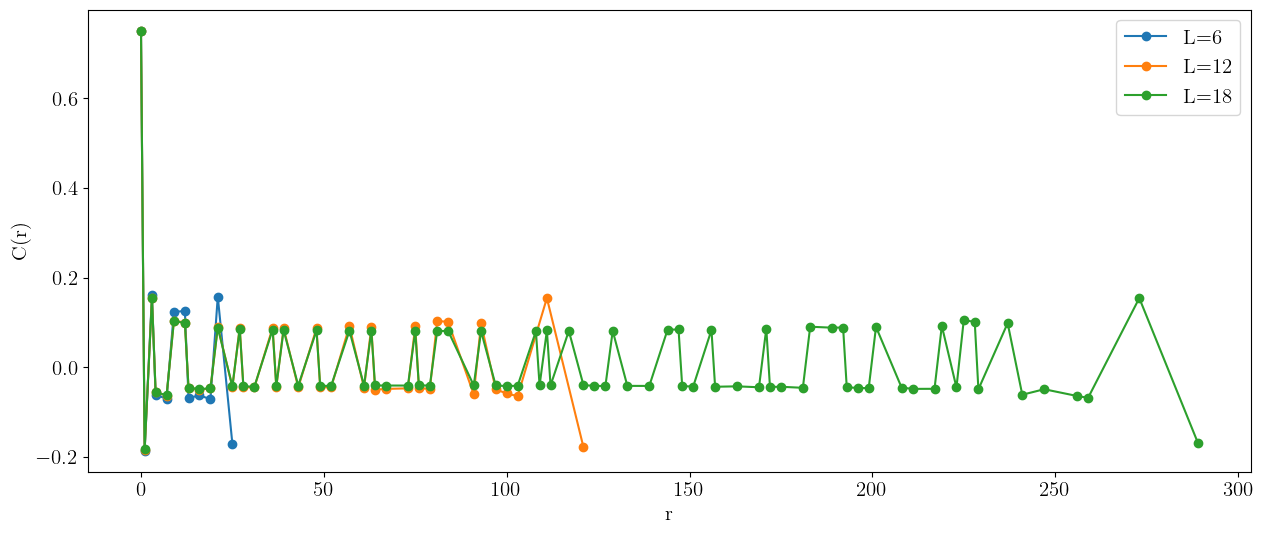

In [23]:
fig = plt.figure(figsize=(15,6))
eta = 0.5
for l in [6,12,18]:
    rs = []
    C_rs = []
    for r in C_r[f"L={l}"].keys():
        rs.append(r)
        C_rs.append(C_r[f"L={l}"][r]['sum']/C_r[f"L={l}"][r]['count'])
    indices = np.argsort(np.array(rs))
    sorted_rs = np.array(rs)[indices]
    sorted_C_rs = np.array(C_rs)[indices]
    plt.plot(sorted_rs,sorted_C_rs,label=f'L={l}',marker='o')
    print(len(rs))

plt.xlabel("r")
plt.ylabel("C(r)")
# plt.yscale('log')
plt.legend()
plt.show()

Maybe I am doing something wrong in my calculation, but otherwise it looks like the model is doing something wack and just keeping the long range correlations